In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np

2024-02-07 22:22:51.621324: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-07 22:22:51.815886: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-02-07 22:22:51.815925: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-02-07 22:22:52.780526: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

2024-02-07 22:22:54.144423: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-02-07 22:22:54.144452: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-02-07 22:22:54.144475: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nacho-ubuntu): /proc/driver/nvidia/version does not exist


In [3]:
df = pd.read_csv('../../3days.csv', nrows=50000)

In [4]:
(df["from_address"] == df["to_address"]).sum()

1195

In [5]:
df = df[df["from_address"] != df["to_address"]]

In [6]:
(df["from_address"] == df["to_address"]).sum()

0

In [7]:
df.columns

Index(['block_timestamp', 'transaction_hash', 'transaction_index', 'nonce',
       'from_address', 'to_address', 'value', 'value_lossless', 'gas',
       'gas_price', 'max_fee_per_gas', 'max_priority_fee_per_gas',
       'transaction_type'],
      dtype='object')

In [8]:
len(set(df['from_address']).union(set(df['to_address'])))

43493

In [9]:
df = df[~df.to_address.isna()]
df = df[~df.from_address.isna()]

In [10]:
ids = {}

for i, id in enumerate(set(df['from_address']).union(set(df['to_address']))):
    ids[id] = i

In [11]:
ids

{'0x75ea8bce827c33b44edf8e1e72a3055d91e2d464': 0,
 '0x8888888888e9997e64793849389a8faf5e8e547c': 1,
 '0x7b5d0e95a798b037ce9370311d494ac4de4f1c63': 2,
 '0x995a826fc3dd9cf4f26948dd187a08129ecc37e4': 3,
 '0x49d263846090dcd9e4af7d55eb808e5dbef2c25e': 4,
 '0x927bec6bf367221605c5d9b3d89e2ed076a8d526': 5,
 '0x4b765ab6cb992a5f763e30c5b66fe274e971924a': 6,
 '0x00158a74921620b39e5c3afe4dca79feb2c2c143': 7,
 '0x1625600b38dfa50e3a29a93d5dd210360630e527': 8,
 '0x1f07988f7f8d3ad390539f2c09b2459231392fd4': 9,
 '0xbc6e0f6b2d53ad5664db2edbd43cc35695bc7aa5': 10,
 '0xe486f5d07a34465374efff0fb11a5ca24d38d3c5': 11,
 '0x6447913a839b3115382cc44ea8d3d0ef9889487e': 12,
 '0x6e33281fe797deccda455ee7427d6cb62ddbc191': 13,
 '0x4c3b0bf2fd4213d25f67c6378bc3c76f7877a926': 14,
 '0x81518446489aa2753add91b877ff3e98882f3105': 15,
 '0x0dd275dac32ed05bebace24548ce6bc69eae595e': 16,
 '0xf20e53b1b21b4cf9e688aa65439e4c364f51fac9': 17,
 '0x58a5c214e74aac3f84512ebc7feffb26a06341bd': 18,
 '0xb7f61499e8294367bfd3cc40e294abefde21f

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, BatchNormalization, Lambda, GaussianNoise


# el 1 representa a cualquier indice, un tensor de una dimensión
input_aux = Input(1)

# el 128 es arbitrario, podría ser de cualquier valor
x = Embedding(len(ids), 128)(input_aux)

x = GaussianNoise(0.02)(x)

# TODO: investigar que es esto
output_aux = Dense(64)(x)

# lleva todos los valores entre -1 y 1


model_aux = Model(input_aux, output_aux)
model_aux.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 embedding (Embedding)       (None, 1, 128)            5565696   
                                                                 
 gaussian_noise (GaussianNoi  (None, 1, 128)           0         
 se)                                                             
                                                                 
 dense (Dense)               (None, 1, 64)             8256      
                                                                 
Total params: 5,573,952
Trainable params: 5,573,952
Non-trainable params: 0
_________________________________________________________________


2024-02-07 22:22:54.711067: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
# son los 3 inputs que representan las 3 cabezas de la red, lo que se conoce como siamesa
input_layer_anchor = Input(1)
input_layer_positive = Input(1)
input_layer_negative = Input(1)

x_a = model_aux(input_layer_anchor)
x_p = model_aux(input_layer_positive)
x_n = model_aux(input_layer_negative)

# un tensor es ... investigar bien. Puede ser cualquier cosa, literalmente.
merged_output = Lambda(lambda tensors: tf.stack(tensors, axis=-1))([x_a, x_p, x_n])

model = Model([input_layer_anchor, input_layer_positive, input_layer_negative], merged_output)

In [14]:
from keras.utils import Sequence
import numpy as np

class GeneratorTriplet(Sequence):
    def __init__(self, df, ids, batch_size):
        self.df = df
        self.act_index = 0
        self.ids = ids
        self.batch_size = batch_size
        self.limit = int(np.ceil(len(self.df) / self.batch_size))

    def __len__(self):
        return int(np.ceil(len(self.df) / self.batch_size))
    
    
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.act_index < self.limit:
            resultado = self.__getitem__(self.act_index)
            self.act_index += 1
            return resultado
        else:
            raise StopIteration

    def __getitem__(self, index):
        # el Anchor es un A, el positive es un B y el negative es un C. Queremos acercar A y B tanto como sea posible alejando a C. Podría suceder que sea un vecino, pero la probabilidad es baja porque es al azar.
        # Si llegara a elegir algún vecino mal, de casualidad, en una siguiente epoch debería corregirse o inclusive en una misma epoch en una siguiente iteración del generador.
        init = index * self.batch_size
        end = (index + 1) * self.batch_size

        # el batch van a ser #batch_size tuplas que representan el anchor y positive. El negative es un random.
        batch = self.df[init:end]

        # me agarro un sample de #batch_size transacciones.
        negative = self.df.sample(len(batch))

        anchor = np.array(batch['from_address'].apply(lambda x: self.ids.get(x)))
        positive = np.array(batch['to_address'].apply(lambda x: self.ids.get(x)))
        negative = np.array(negative['to_address'].apply(lambda x: self.ids.get(x)))
        
        anchor = tf.convert_to_tensor(anchor)
        positive = tf.convert_to_tensor(positive)
        negative = tf.convert_to_tensor(negative)
        
        # el fake target simula lo que sería aprendizaje supervisado        
        fake_target = tf.convert_to_tensor(np.array([1]*self.batch_size))

        return ([anchor, positive, negative], [fake_target]*3)

In [15]:
generator = GeneratorTriplet(df, ids, 128)

In [16]:
class TripletCustom(tf.keras.losses.Loss):
    def __init__(self, margin=3.0, **kwargs):
        super().__init__(**kwargs)
        self.margin = margin

    def __call__(self, y, y_pred, sample_weight=None):
        anchor, positive, negative =  tf.split(y_pred, num_or_size_splits=3, axis=-1)
        distance_positive = tf.reduce_sum(tf.square(anchor - positive), axis=1)
        distance_negative = tf.reduce_sum(tf.square(anchor - negative), axis=1)

        loss = tf.maximum(distance_positive - distance_negative + self.margin, 0.0)
        return tf.reduce_mean(loss)

loss = TripletCustom()    

model.compile(
    optimizer=Adam(1e-3),
    loss=loss
)

In [34]:
model.fit(generator, epochs=600)

Epoch 1/600
382/382 [==============================] - 23s 61ms/step - loss: 0.4349
Epoch 2/600
382/382 [==============================] - 23s 60ms/step - loss: 0.4531
Epoch 3/600
382/382 [==============================] - 23s 61ms/step - loss: 0.4571
Epoch 4/600
382/382 [==============================] - 24s 61ms/step - loss: 0.4427
Epoch 5/600
382/382 [==============================] - 27s 70ms/step - loss: 0.4388
Epoch 6/600
382/382 [==============================] - 28s 73ms/step - loss: 0.4436
Epoch 7/600
382/382 [==============================] - 28s 72ms/step - loss: 0.4431
Epoch 8/600
382/382 [==============================] - 28s 73ms/step - loss: 0.4569
Epoch 9/600
382/382 [==============================] - 28s 72ms/step - loss: 0.4441
Epoch 10/600
382/382 [==============================] - 27s 71ms/step - loss: 0.4505
Epoch 11/600
382/382 [==============================] - 27s 72ms/step - loss: 0.4493
Epoch 12/600
382/382 [==============================] - 24s 64ms/step - lo

KeyboardInterrupt: 

# Guardo el embedding y los ids

In [35]:
embedding_matrix = model_aux.get_layer(name="embedding").get_weights()
np.array(embedding_matrix).dump("embedding_matrix.npy")

In [36]:
import pickle
with open('ids.pkl', 'wb') as f:
    pickle.dump(ids, f)

In [37]:
embedding_matrix = np.load("embedding_matrix.npy", allow_pickle=True)

In [38]:
embedding_matrix

array([[[ 0.13687825, -0.06759278, -0.06999955, ..., -0.05418931,
         -0.07266662, -0.08559414],
        [-0.20842135,  0.2707917 ,  0.24564168, ...,  0.27705508,
          0.24920633,  0.28096026],
        [ 0.37016875, -0.3682321 , -0.35968012, ..., -0.4134944 ,
         -0.3871351 , -0.420915  ],
        ...,
        [-0.54984546,  0.61084527,  0.5695212 , ...,  0.5756097 ,
          0.5398198 ,  0.56060666],
        [-0.5695294 ,  0.6181333 ,  0.5960648 , ...,  0.6029494 ,
          0.59514844,  0.578311  ],
        [-0.04305195,  0.07342227,  0.00236883, ...,  0.07965346,
          0.02829054,  0.01789469]]], dtype=float32)

In [39]:
embedding_matrix[0].shape

(43482, 128)

In [40]:
import umap
embedding = umap.UMAP(n_components=2).fit(embedding_matrix[0])

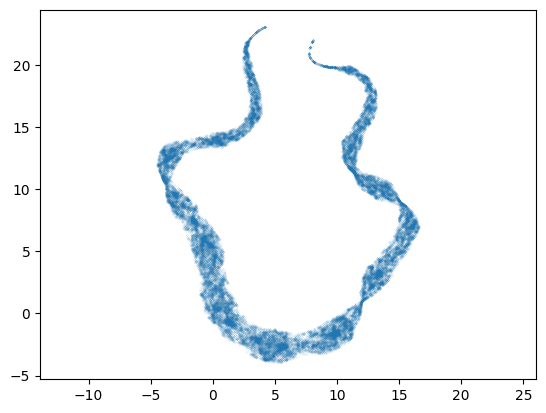

In [41]:
import matplotlib.pyplot as plt
plt.scatter(embedding.embedding_[:, 0], embedding.embedding_[:, 1], alpha=0.4, s=0.02)
plt.gca().set_aspect('equal', 'datalim')
plt.show()